# Hybrid Recommender system
## Books for mystery, thriller, and crime
https://sites.google.com/eng.ucsd.edu/ucsdbookgraph/home

In [1]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

import pandas as pd
import numpy as np

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [3]:
test_df = pd.read_csv("final_test.csv")
test_df.head()

,Unnamed: 0,user_id,book_id,rating
0,1360809,ed6f2fb87ff0c0765f222ed6420880a8,14781501,4
1,345979,3ee7b230aa769fa9117dfdfd30ea7d3c,32073180,4
2,886733,b4003ff80c6ef3d78fe1235fe6699909,438247,3
3,210164,ea2448eccbd13518d3e059c651a38f47,162085,4
4,1521747,39e98f8a7c65c21749895a6bbfc7680f,32682,5


In [4]:
# Read the results of NLP with KMeans Model
knn_result = pd.read_csv("knn_result.csv")[['user_id', 'book_id', 'rating', 'predicted_rating']]
knn_result['predicted_rating'] = pd.to_numeric(knn_result['predicted_rating'], errors="coerce")
knn_result.head()

,user_id,book_id,rating,predicted_rating
0,ed6f2fb87ff0c0765f222ed6420880a8,14781501,4,3.430397
1,cb58cc382caf92051a367b65384e0dde,14781501,4,3.430397
2,de4bb51ba7805900233e9c1c3f0a6930,14781501,5,3.430397
3,3ee7b230aa769fa9117dfdfd30ea7d3c,32073180,4,3.119048
4,b4003ff80c6ef3d78fe1235fe6699909,438247,3,3.601594


In [5]:
knn_result.describe()

,book_id,rating,predicted_rating
count,5.000000e+04,50000.000000,49674.000000
mean,8.375332e+06,3.611440,3.607970
std,9.923950e+06,1.310822,0.390416
min,2.160000e+02,0.000000,0.000000
25%,9.964100e+04,3.000000,3.440724
50%,2.747602e+06,4.000000,3.658350
75%,1.613046e+07,5.000000,3.842105
max,3.644172e+07,5.000000,5.000000


In [6]:
#Calculating number of null predictions
knn_result['predicted_rating'].isnull().sum()

326

In [7]:
#Impute missing values with mean strategy
knn_result_meanfill = knn_result.copy(deep=True)

In [8]:
knn_result_meanfill['predicted_rating'] = knn_result_meanfill['predicted_rating'].fillna(knn_result_meanfill['predicted_rating'].mean())
knn_result['predicted_rating'] = knn_result['predicted_rating'].fillna(-1)

In [9]:
knn_result.describe()

,book_id,rating,predicted_rating
count,5.000000e+04,50000.000000,50000.000000
mean,8.375332e+06,3.611440,3.577926
std,9.923950e+06,1.310822,0.537562
min,2.160000e+02,0.000000,-1.000000
25%,9.964100e+04,3.000000,3.433948
50%,2.747602e+06,4.000000,3.656845
75%,1.613046e+07,5.000000,3.841309
max,3.644172e+07,5.000000,5.000000


In [10]:
knn_result_meanfill.describe()

,book_id,rating,predicted_rating
count,5.000000e+04,50000.000000,50000.000000
mean,8.375332e+06,3.611440,3.607970
std,9.923950e+06,1.310822,0.389142
min,2.160000e+02,0.000000,0.000000
25%,9.964100e+04,3.000000,3.443311
50%,2.747602e+06,4.000000,3.656845
75%,1.613046e+07,5.000000,3.841309
max,3.644172e+07,5.000000,5.000000


In [11]:
#Read results of Neural Network model
nnmodel_result = pd.read_csv("nnmodel_result.csv")[['user_id', 'book_id', 'rating', 'pred_rating']]
nnmodel_result.head()

,user_id,book_id,rating,pred_rating
0,ed6f2fb87ff0c0765f222ed6420880a8,14781501,4,3.423078
1,3ee7b230aa769fa9117dfdfd30ea7d3c,32073180,4,3.504261
2,b4003ff80c6ef3d78fe1235fe6699909,438247,3,3.504261
3,ea2448eccbd13518d3e059c651a38f47,162085,4,3.360014
4,39e98f8a7c65c21749895a6bbfc7680f,32682,5,4.776507


In [12]:
nnmodel_result.describe()

,book_id,rating,pred_rating
count,5.000000e+04,50000.000000,50000.000000
mean,8.375332e+06,3.611440,3.625862
std,9.923950e+06,1.310822,0.708066
min,2.160000e+02,0.000000,0.000000
25%,9.964100e+04,3.000000,3.428154
50%,2.747602e+06,4.000000,3.672430
75%,1.613046e+07,5.000000,3.934114
max,3.644172e+07,5.000000,5.350930


In [13]:
#Function to calculate RMSE
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())


In [14]:
#RMSE of NLP model with missing values
rmse_knn = rmse(np.array(knn_result['predicted_rating']), np.array(knn_result['rating']))
rmse_knn

1.3400596884497615

In [15]:
#RMSE of NLP model with imputed values
rmse_knn_meanfill = rmse(np.array(knn_result_meanfill['predicted_rating']), np.array(knn_result_meanfill['rating']))
rmse_knn_meanfill

1.292241655757734

In [16]:
#RMSE of Neural Network model
rmse_nnmodel = rmse(np.array(nnmodel_result['pred_rating']), np.array(nnmodel_result['rating']))
rmse_nnmodel

1.4878087495419903

In [17]:
#Merging results of component models
merged_results = knn_result.merge(nnmodel_result, 'inner', on = ['user_id', 'book_id', 'rating'])
merged_results.columns = ['user_id', 'book_id', 'rating', 'knn_pred_rating', 'nnmodel_pred_rating']

In [18]:
merged_results_meanfill = knn_result_meanfill.merge(nnmodel_result, 'inner', on = ['user_id', 'book_id', 'rating'])
merged_results_meanfill.columns = ['user_id', 'book_id', 'rating', 'knn_pred_rating', 'nnmodel_pred_rating']

In [19]:
merged_results.head()

,user_id,book_id,rating,knn_pred_rating,nnmodel_pred_rating
0,ed6f2fb87ff0c0765f222ed6420880a8,14781501,4,3.430397,3.423078
1,cb58cc382caf92051a367b65384e0dde,14781501,4,3.430397,3.025937
2,de4bb51ba7805900233e9c1c3f0a6930,14781501,5,3.430397,3.493814
3,3ee7b230aa769fa9117dfdfd30ea7d3c,32073180,4,3.119048,3.504261
4,b4003ff80c6ef3d78fe1235fe6699909,438247,3,3.601594,3.504261


In [20]:
#Function for switching and combining
def combiner(knn_pred, nnmodel_pred):
    if knn_pred == -1:
        comb_rating = nnmodel_pred
    else:
        comb_rating = 0.92 * knn_pred + 0.08 * nnmodel_pred
    return comb_rating
merged_results['combined_rating'] = merged_results.apply(lambda x: combiner(x['knn_pred_rating'], x['nnmodel_pred_rating']), axis = 1)


In [21]:
#RMSE of hybrid model with switching and weighted average
rmse_combined = rmse(np.array(merged_results['combined_rating']), np.array(merged_results['rating']))
rmse_combined

1.2919824346996855

In [22]:
#RMSE of hybrid model with weights 0.5 & 0.5
merged_results_meanfill['combined_rating'] = 0.5*merged_results_meanfill['knn_pred_rating'] + 0.5*merged_results_meanfill['nnmodel_pred_rating']
rmse_combined_1 = rmse(np.array(merged_results_meanfill['combined_rating']), np.array(merged_results_meanfill['rating']))
rmse_combined_1

1.333819447054821

In [23]:
#RMSE of hybrid model with weights 0.7 & 0.3
merged_results_meanfill['combined_rating'] = 0.7*merged_results_meanfill['knn_pred_rating'] + 0.3*merged_results_meanfill['nnmodel_pred_rating']
rmse_combined_2 = rmse(np.array(merged_results_meanfill['combined_rating']), np.array(merged_results_meanfill['rating']))
rmse_combined_2

1.302444709255046

In [24]:
#RMSE of hybrid model with weights 0.8 & 0.2
merged_results_meanfill['combined_rating'] = 0.8*merged_results_meanfill['knn_pred_rating'] + 0.2*merged_results_meanfill['nnmodel_pred_rating']
rmse_combined_3 = rmse(np.array(merged_results_meanfill['combined_rating']), np.array(merged_results_meanfill['rating']))
rmse_combined_3

1.2940344108922428

In [25]:
merged_results_meanfill['combined_rating'] = 0.92*merged_results_meanfill['knn_pred_rating'] + 0.08*merged_results_meanfill['nnmodel_pred_rating']

In [26]:
#RMSE of hybrid model with imputation and weighted average with weights 0.92 and 0.08
rmse_combined_meanfill = rmse(np.array(merged_results_meanfill['combined_rating']), np.array(merged_results_meanfill['rating']))
rmse_combined_meanfill

1.2905413894162379

<Figure size 432x288 with 0 Axes>

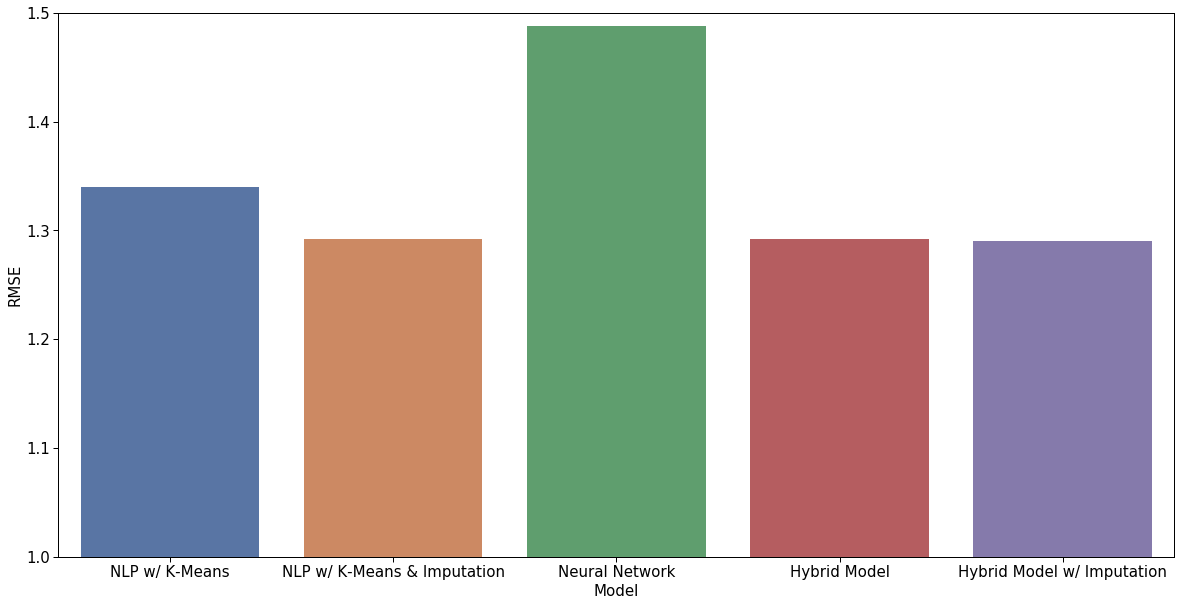

In [27]:
#Comparison of RMSE scores of different models
fig = plt.figure()
sns.set_context('paper')
plt.figure(figsize=(20,10))
algos = ['NLP w/ K-Means', 'NLP w/ K-Means & Imputation', 'Neural Network', 'Hybrid Model', 'Hybrid Model w/ Imputation']
rmses = [rmse_knn, rmse_knn_meanfill, rmse_nnmodel, rmse_combined, rmse_combined_meanfill]
sns.barplot(x = algos, y = rmses, palette='deep').set_ylim(1, 1.5)
plt.ylabel("RMSE", fontsize=15)
plt.xlabel("Model", fontsize=15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

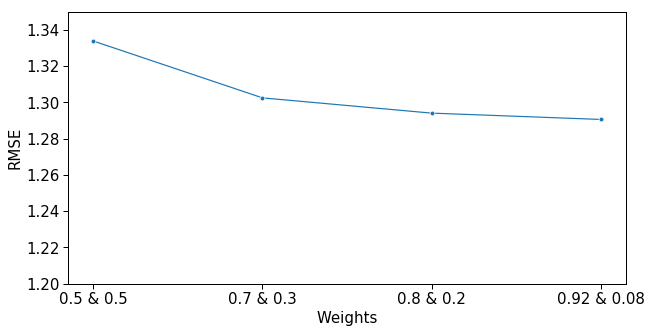

In [28]:
#RMSE vs Weights
sns.set_context('paper')
plt.figure(figsize=(10,5))
algos = ['0.5 & 0.5', '0.7 & 0.3', '0.8 & 0.2', '0.92 & 0.08']
# algos = ['NLP w/ K-Means', 'NLP w/ K-Means & Imputation', 'Neural Network', 'Hybrid Model']
rmses = [rmse_combined_1, rmse_combined_2, rmse_combined_3, rmse_combined_meanfill]
sns.lineplot(x = algos, y = rmses, marker="o").set_ylim(1.2, 1.35)
plt.ylabel("RMSE", fontsize=15)
plt.xlabel("Weights", fontsize=15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()